In [1]:
basedir = '/home/abhinavgupta0110/NeuralODEs_ROM_Closure'

import os

is_google_colab = False

### Mount the Google drive if needed

In [2]:
if is_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    
    %pip install quadpy

os.chdir(os.path.join(basedir, 'neuralClosureModels'))

In [3]:
from src.solvers.neuralDDE_with_adjoint_accel import history

import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [4]:
os.chdir(basedir)

In [5]:
class args:
    def __init__(self, model_dir):
        self.model_dir = model_dir

In [6]:
class read_data:

    def __init__(self, last = 20):
        self.last = last

    def read(self, model_dir):

        data = []
        
        for i in range(len(model_dir)):
            data.append([])
            for j in range(len(model_dir[i])):
                
                loss_history = history(args(model_dir[i][j]))
                loss_history.read()
#                 print(model_dir[i][j], len(loss_history.val_loss))
                for k in range(self.last):
                    data_to_add = loss_history.val_loss[-1 - k]

                    if data_to_add >= 2.: 
                        pass
                    else:
                        data[i].append(data_to_add)
                
        return data
                            

In [7]:
model_dirs = []

model_dirs.append(['Bio_nODE_testcase_v3/model_dir_case2', 'Bio_nODE_testcase_v3/model_dir_case2b',
                  'Bio_nODE_testcase_v3/model_dir_case2c', 'Bio_nODE_testcase_v3/model_dir_case2d',
                  'Bio_nODE_testcase_v3/model_dir_case2e', 'Bio_nODE_testcase_v3/model_dir_case2f',
                  'Bio_nODE_testcase_v3/model_dir_case2g', 'Bio_nODE_testcase_v3/model_dir_case2h',
                  'Bio_nODE_testcase_v3/model_dir_case2i', 'Bio_nODE_testcase_v3/model_dir_case2j',
                  'Bio_nODE_testcase_v3/model_dir_case2k', 
                   'Bio_nODE_testcase_v3/model_dir_case2l',
                   'Bio_nODE_testcase_v3/model_dir_case2n'])

model_dirs.append(['Bio_nDistDDE_testcase_v3/model_dir_case14', 'Bio_nDistDDE_testcase_v3/model_dir_case14b',
                  'Bio_nDistDDE_testcase_v3/model_dir_case14c', 'Bio_nDistDDE_testcase_v3/model_dir_case14d',
                  'Bio_nDistDDE_testcase_v3/model_dir_case14e', 'Bio_nDistDDE_testcase_v3/model_dir_case14f',
                  'Bio_nDistDDE_testcase_v3/model_dir_case14g', 'Bio_nDistDDE_testcase_v3/model_dir_case14h',
                  'Bio_nDistDDE_testcase_v3/model_dir_case14i', 'Bio_nDistDDE_testcase_v3/model_dir_case14j',
                  'Bio_nDistDDE_testcase_v3/model_dir_case14k', 
                  'Bio_nDistDDE_testcase_v3/model_dir_case14m'])

model_dirs.append(['Bio_nDistDDE_testcase_v3/model_dir_case13', 'Bio_nDistDDE_testcase_v3/model_dir_case13b',
                  'Bio_nDistDDE_testcase_v3/model_dir_case13c', 'Bio_nDistDDE_testcase_v3/model_dir_case13d',
                  'Bio_nDistDDE_testcase_v3/model_dir_case13e', 'Bio_nDistDDE_testcase_v3/model_dir_case13f',
                  'Bio_nDistDDE_testcase_v3/model_dir_case13g', 'Bio_nDistDDE_testcase_v3/model_dir_case13h',
                  'Bio_nDistDDE_testcase_v3/model_dir_case13j',
                  'Bio_nDistDDE_testcase_v3/model_dir_case13k', 
                  'Bio_nDistDDE_testcase_v3/model_dir_case13m', 
                  ])

model_dirs.append(['Bio_nDistDDE_testcase_v3/model_dir_case15', 
                  'Bio_nDistDDE_testcase_v3/model_dir_case15c', 'Bio_nDistDDE_testcase_v3/model_dir_case15d', 
                   'Bio_nDistDDE_testcase_v3/model_dir_case15e', 'Bio_nDistDDE_testcase_v3/model_dir_case15f',
                  'Bio_nDistDDE_testcase_v3/model_dir_case15g', 
                  'Bio_nDistDDE_testcase_v3/model_dir_case15i', 'Bio_nDistDDE_testcase_v3/model_dir_case15j',
                  'Bio_nDistDDE_testcase_v3/model_dir_case15k', 'Bio_nDistDDE_testcase_v3/model_dir_case15l',])


times = [0.0, 1.0, 2.5, 5.0]

In [8]:
data = read_data(last=50).read(model_dirs)

/home/abhinavgupta0110/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


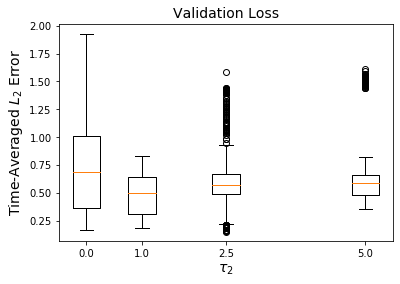

In [13]:
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = fig.add_subplot(111)

ax.cla()
ax.set_title('Validation Loss', fontsize=14)
ax.set_xlabel('$\\tau_2$', fontsize=14)
ax.set_ylabel('Time-Averaged $L_2$ Error', fontsize=14)

ax.boxplot(data, positions = times)

ax.set_xlim(-0.5, 5.5)

plt.show() 